# Data Visualization

In [39]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"

# Training process

average reward: 31751.47, min: 10775.32, max: 55351.12


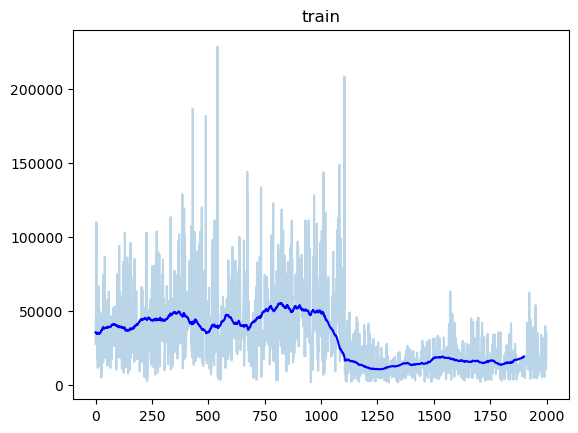

In [38]:
a = np.load(f'linear_rl_trader_rewards/train.npy') 
# this is not exactly the reward, but the final portfolio value (we should subtract the initial cash)

# show the training progress
plt.plot(a, alpha=0.3)

# calculate the moving average
a = np.convolve(a, np.ones(100)/100, mode='valid')

# plot the moving average
plt.plot(a, color='blue')

print(f"average reward: {a.mean():.2f}, min: {a.min():.2f}, max: {a.max():.2f}")



plt.title("train")
plt.show()

# Test process

average reward: 146871.13, min: 70704.23, max: 398627.59


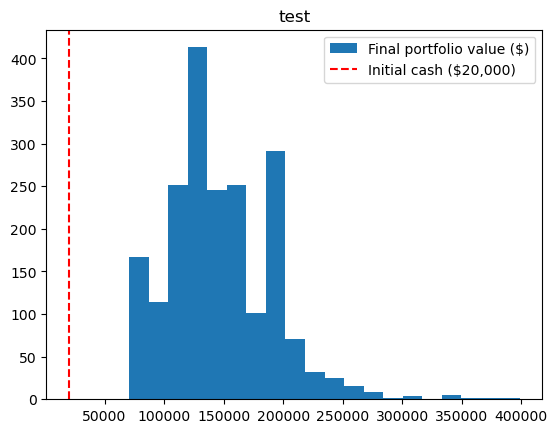

In [15]:
a = np.load(f'linear_rl_trader_rewards/test.npy') 
# this is not exactly the reward, but the final portfolio value (we should subtract the initial cash)

print(f"average reward: {a.mean():.2f}, min: {a.min():.2f}, max: {a.max():.2f}")

# test - show a histogram of rewards
plt.hist(a, bins=20, label='Final portfolio value ($)')

# plot a vertical line at 20000
plt.axvline(20000, color='r', linestyle='--', label='Initial cash ($20,000)')   

plt.title("test")
plt.legend()
plt.show()

# Benchmark: S&P Crypto Index

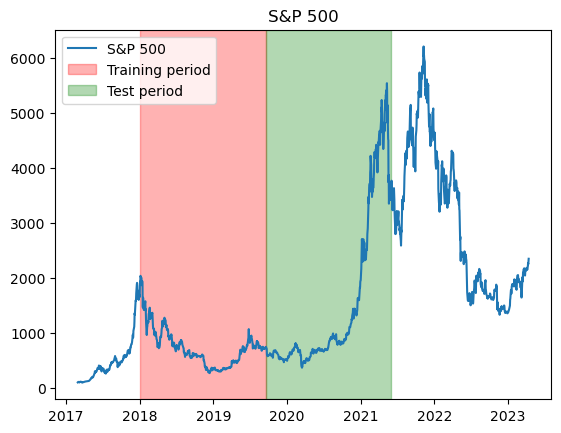

In [48]:
# Load the s&p index, skip the first 6 rows and the last 2 rows
df = pd.read_excel('PerformanceGraphExport.xls', skiprows=6, skipfooter=4)

# rename the columns
df.columns = ['date', 's&p']

# convert the date column to datetime
df['date'] = pd.to_datetime(df['date'])

# reset the index
df = df.reset_index(drop=True)

# sort the dataframe by date
df = df.sort_values(by='date')

start_timestamp = pd.to_datetime('2018-01-01')

end_timestamp = pd.to_datetime('2021-06-01')

# generate the calendar dates between start_timestamp and end_timestamp
dates = pd.date_range(start=start_timestamp, end=end_timestamp, freq='B')

# half way point
train_timestamp = dates[len(dates)//2]


# plot the s&p index
_ = plt.plot(df['date'], df['s&p'], label='S&P 500')

# plot the training period
_ = plt.axvspan(start_timestamp, train_timestamp, alpha=0.3, color='red', label='Training period')

# plot the test period
_ = plt.axvspan(train_timestamp, end_timestamp, alpha=0.3, color='green', label='Test period')

_ = plt.legend()
_ = plt.title('S&P 500')
_ = plt.show()